<a href="https://colab.research.google.com/github/chloepalin/chloepalin.github.io/blob/master/class7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [3]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!ls gdrive/MyDrive


'animal_classifier (1).zip'
 animal_classifier.zip
'archive (2).zip'
 archive.zip
'CHLOE PERSONAL USB'
 ciimages.zip
'Colab Notebooks'
 CSSE3010
'Design and Development of an Assistive Technology Device for Enhancing the Running Performance of Blind Athletes.gdoc'
'Design and Development of an Assistive Technology Device for Enhancing the Running Performance of Blind Athleteshesis.gdoc'
'dino code.gdoc'
'EA competencies.gdoc'
 ENGG4900
'Engineering reflections.gdoc'
'FIRST YEAR'
'gui for ELEC4630 a2.3.gdoc'
 HBI
 HOUSE
'How to become a chartered engineer.gdoc'
'LAB4 BIOE6403.gdoc'
'Market Analysis and sales forecast..gdoc'
 milestone.pdf
 ProgressSem1.pptx
'Project brief for my thesis.gdoc'
'Proposal Draft.gdoc'
 RANDOM
'SECOND YEAR'
'sem participation.pdf'
 Snapseed.jpg
 test.zip
 thesis
'Thesis Idea Development.gdoc'
'THIRD YEAR'
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled document (4).gdoc'
'Untitled document (5).gdoc'
'Untitled d

In [6]:
!unzip gdrive/My\ Drive/animal_classifier.zip

Archive:  gdrive/My Drive/animal_classifier.zip
   creating: animal_classifier/
   creating: animal_classifier/octopus/
  inflating: animal_classifier/octopus/1fe7174d-f3e1-4c77-b74a-1cd248c5e76d.jpg  
  inflating: animal_classifier/octopus/75a0da56-7989-4309-8fe0-3856983e4655.jpg  
  inflating: animal_classifier/octopus/d10769fe-ba13-4961-9831-ce55d72a8b73.jpg  
  inflating: animal_classifier/octopus/99b2d21d-c867-4908-895d-dd279f14f412.jpg  
  inflating: animal_classifier/octopus/6d5109c0-d7d7-4f9b-88fc-8d121988d917.jpg  
  inflating: animal_classifier/octopus/fded0a5d-5627-431c-ac8b-e4691d9dbb38.jpg  
  inflating: animal_classifier/octopus/439fe252-4e33-4398-94d5-ef1e54f2cfeb.jpg  
  inflating: animal_classifier/octopus/195e4313-03fa-4176-84af-61e810c140b6.png  
  inflating: animal_classifier/octopus/13363388-98fe-40dd-8449-e43c8e77432c.jpg  
  inflating: animal_classifier/octopus/1ff66c7b-7a20-4162-8c38-5ed4c7b968ec.jpg  
  inflating: animal_classifier/octopus/1f5015f2-72e4-4d33-84

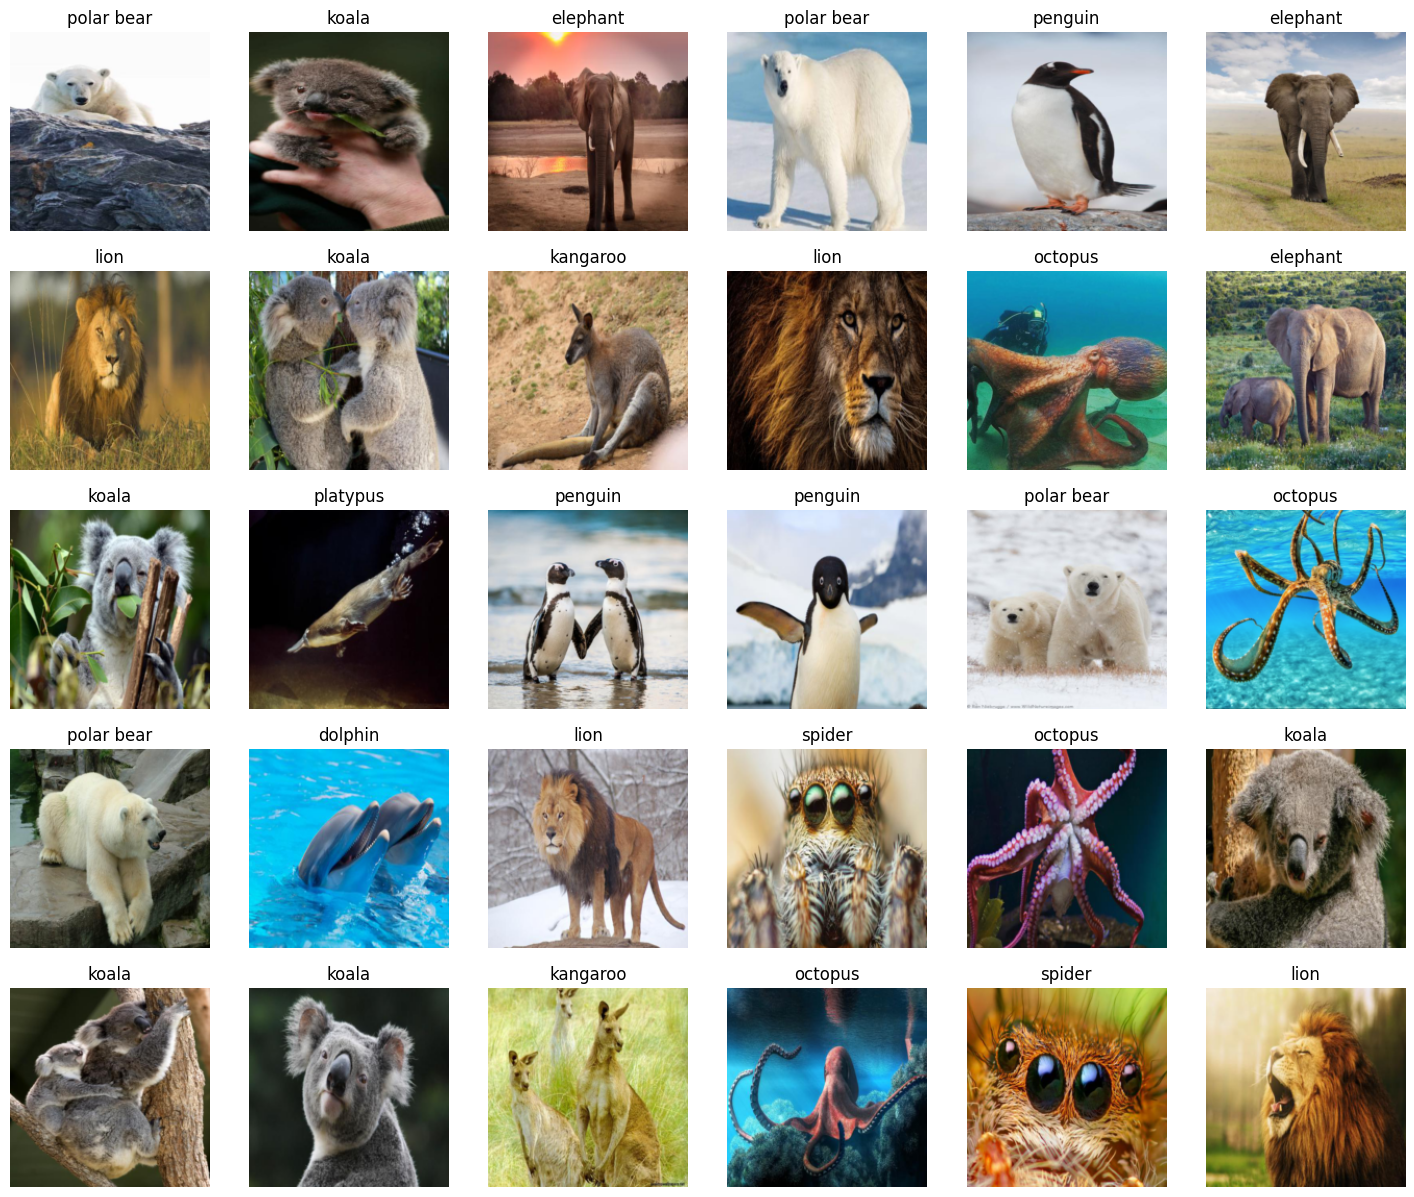

In [7]:
#from pathlib import Path
from fastai.vision.all import *
path = Path('animal_classifier')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=30)


In [22]:
learn = vision_learner(dls, resnet18, metrics=accuracy)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0012022644514217973, slide=0.0004786300996784121)

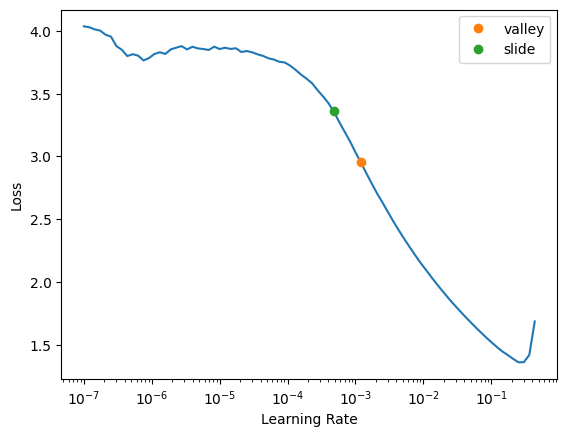

In [23]:
learn.lr_find(suggest_funcs=(valley, slide))


In [24]:
learn.fine_tune(10, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,1.293000,0.041957,0.993976,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.038579,0.052517,0.981928,00:04
1,0.028695,0.043572,0.975904,00:03
2,0.032045,0.280873,0.969880,00:03
3,0.056794,0.251040,0.933735,00:03
4,0.086337,0.086285,0.975904,00:04
5,0.090843,0.169316,0.939759,00:03
6,0.096096,0.109547,0.963855,00:03
7,0.078493,0.087965,0.975904,00:03
8,0.062860,0.079139,0.975904,00:03
9,0.053903,0.081350,0.975904,00:03


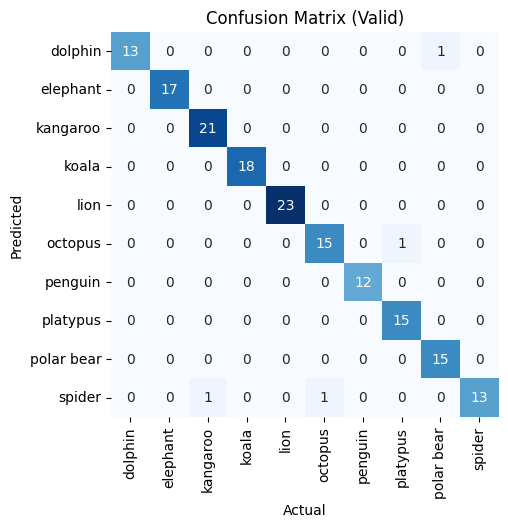

In [25]:
from fastai.vision.all import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predictions and targets for the validation dataset
preds, targets = learn.get_preds(dl=dls.valid)

# Compute the confusion matrix
cm = confusion_matrix(preds.argmax(dim=-1), targets)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=learn.dls.vocab, yticklabels=learn.dls.vocab)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix (Valid)')
plt.show()


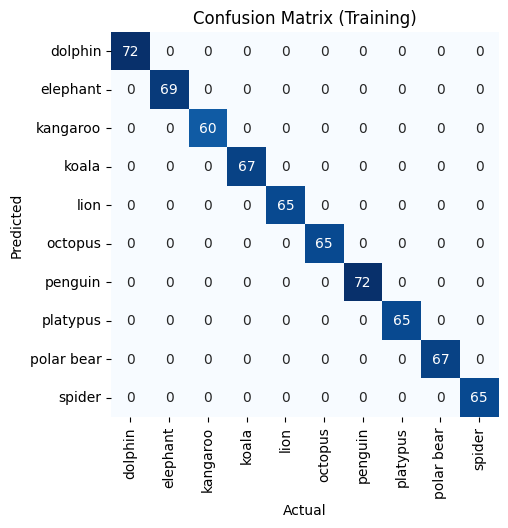

In [27]:
from fastai.vision.all import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predictions and targets for the train dataset
preds, targets = learn.get_preds(dl=dls.train)

# Compute the confusion matrix
cm = confusion_matrix(preds.argmax(dim=-1), targets)

plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=learn.dls.vocab, yticklabels=learn.dls.vocab)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix (Training)')
plt.show()

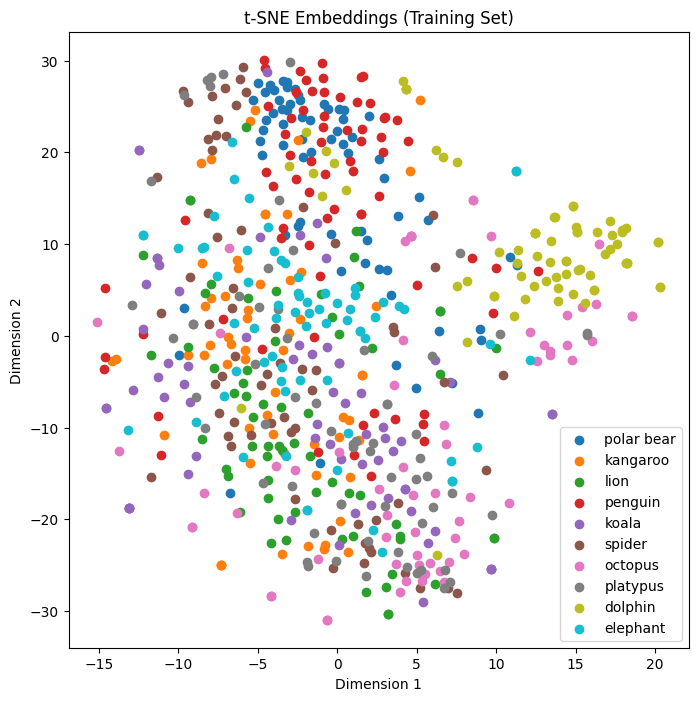

In [28]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

embeddings = learn.get_preds(dl=dls.train, with_input=True)[0].numpy()
num_samples, num_classes, height, width = embeddings.shape
embeddings_2d = embeddings.reshape(num_samples, num_classes * height * width)

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_2d)
labels = [str(parent.parent.name) for parent in dls.train.items]
plt.figure(figsize=(8, 8))
unique_labels = list(set(labels))
for label in unique_labels:
    indices = [i for i, x in enumerate(labels) if x == label]
    valid_indices = [i for i in indices if i < len(embeddings_tsne)]
    plt.scatter(embeddings_tsne[valid_indices, 0], embeddings_tsne[valid_indices, 1], label=label)
plt.title("t-SNE Embeddings (Training Set)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


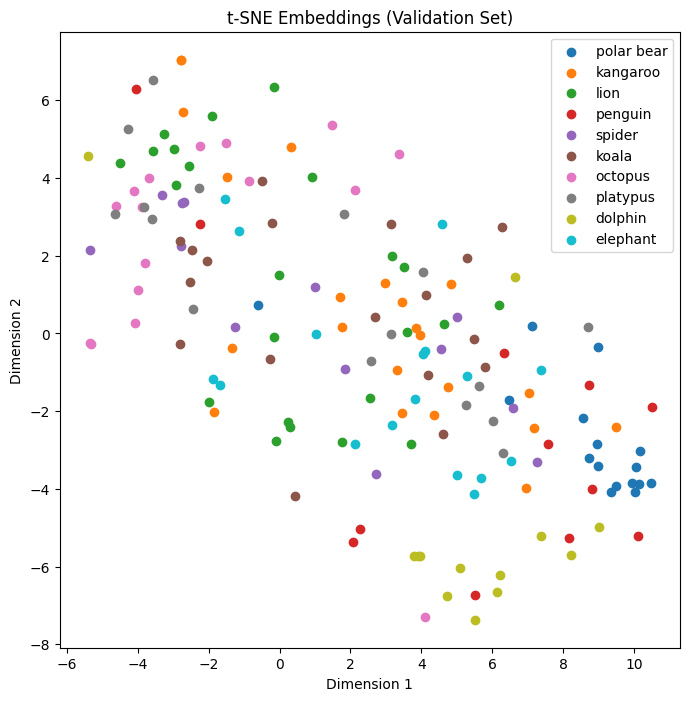

In [29]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

embeddings = learn.get_preds(dl=dls.valid, with_input=True)[0].numpy()
num_samples, num_classes, height, width = embeddings.shape
embeddings_2d = embeddings.reshape(num_samples, num_classes * height * width)

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_2d)
labels = [str(parent.parent.name) for parent in dls.valid.items]
plt.figure(figsize=(8, 8))
unique_labels = list(set(labels))
for label in unique_labels:
    indices = [i for i, x in enumerate(labels) if x == label]
    valid_indices = [i for i in indices if i < len(embeddings_tsne)]
    plt.scatter(embeddings_tsne[valid_indices, 0], embeddings_tsne[valid_indices, 1], label=label)
plt.title("t-SNE Embeddings (Validation Set)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


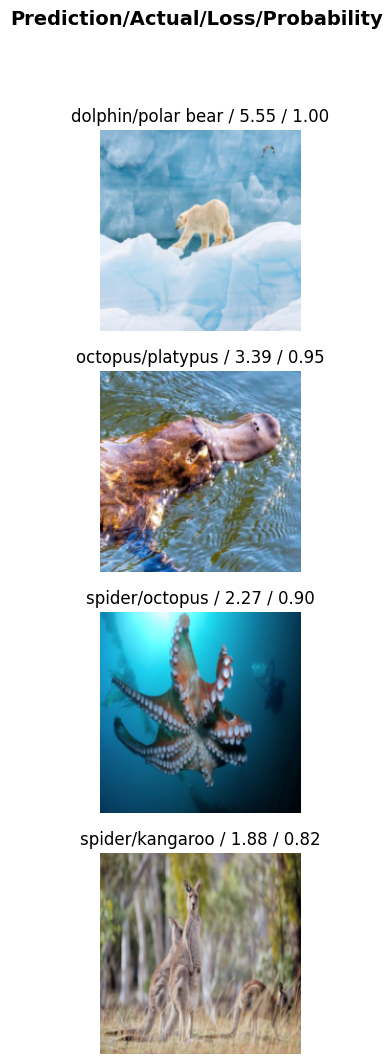

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, nrows=4)
